**AST4310, Autumn 2021, Julia version**

# Project 2: Line Strengths and Curve of Growth ("Marcel Minnaert")

This project was originally written by Robert J. Rutten, and converted to notebook by Tiago M. D. Pereira, using contributions from Luc Rouppe van der Voort, Lluís Mas Ribas, and Henrik Eklund.

#### Header and imports

The cells below contain some code to label equations in Markdown and some recommended Julia imports to solve the exercises.

In [1]:
macro javascript_str(s) display("text/javascript", s); end

javascript"""
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});"""

In [2]:
using Unitful
using UnitfulRecipes   # To make unitful play with plots, otherwise need to ustrip(temp)
using Plots
import PhysicalConstants.CODATA2018: c_0, k_B, m_e, h
import NumericalIntegration: integrate, TrapezoidalEvenFast
using SpecialFunctions: erfcx

┌ Info: Precompiling Unitful [1986cc42-f94f-5a68-af5c-568840ba703d]
└ @ Base loading.jl:1260
┌ Info: Precompiling UnitfulRecipes [42071c24-d89e-48dd-8a24-8a12d9b8861f]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Info: Precompiling PhysicalConstants [5ad8b20f-a522-5ce9-bfc9-ddf1d5bda6ab]
└ @ Base loading.jl:1260
┌ Info: Precompiling SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b]
└ @ Base loading.jl:1260


## 1. Background


In Project 1 you interpret the Harvard classification in terms of physics by using the Saha and Boltzmann laws for the partitioning of the particles of an element over its various modes of existence. The strength variations of spectral lines along the main sequence were found to be primarily due to change in temperature.

We have not yet answered the question *how* spectral lines form. This issue is addressed here following Minnaert's work at Utrecht between World Wars I and II. This exercise introduces you to some of the basic concepts introduced by Minnaert. They are still in use and are instructive to re-develop yourself.

<img src="https://tiagopereira.space/ast4310/images/minnaert.svg" alt="Marcel Minnaert" width="350"/>

*Marcel G.J. Minnaert (Brugge 1893 - Utrecht 1970)
    was a Flemish biologist who became a physicist at Utrecht after 
    World War I, picking up W.H. Julius' interest in solar spectroscopy
    and taking over the solar physics department after Julius' death 
    in 1925.  In 1937 Minnaert succeeded A.A. Nijland 
    as director of "Sterrewacht Sonnenborgh" and
    revived it into a spectroscopy-oriented astrophysical institute. In addition, he 
    was a well-known physics pedagogue. His three books "De natuurkunde van het vrije veld"
    (Outdoors Physics) are a delightful guide to outdoors physics phenomena.
    Rob Rutten took this photograph in 1967.*
    
### 1.1 The Planck law

For electromagnetic radiation the counterparts 
to the material Saha and Boltzmann distributions
are the Planck law and its relatives (the Wien displacement law
and the Stefan-Boltzmann law). (The Saha 
  and Boltzman (and also the Maxwell) 
  distributions have $\exp(-E/kT)$ without the -1 that is present in the
  denominator of the Planck function.  The reason for this difference
  is a basic one: atoms, ions and electrons are fermions that cannot
  occupy the same space-time-impulse slot, but photons are bosons
  that actually prefer to share places, as in a laser.)
They also hold strictly in TE ("Thermodynamical Equilibrium") 
and reasonably well in stellar photospheres. The Planck function specifies the radiation intensity emitted 
by a gas or a body in TE (a "black body") as:

\begin{equation} 
   B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1}
  \label{eq:5.3a}
\end{equation}

with $h$ the Planck constant, 
$c$ the speed of light, 
$k$ the Boltzmann constant, $\lambda$ the wavelength and $T$ the
temperature. The dimension of $B_\lambda$ in the SI units used here is
W m$^{-2}$ nm$^{-1}$ sr$^{-1}$,
which is the dimension of radiative intensity in 
a specific direction. (The quadratic length dimension 
  (m$^{-2}$) represents
  a measurement area oriented perpendicular to the beam direction.
  The linear length dimension (nm$^{-1}$)  represents the spectral bandwidth
  ($\Delta \lambda =$ 1 nm). It becomes $\Delta \nu =$ 1 Hz for
  $B_\nu$ in frequency units.
  Steradians measure beam spreading over solid angle (a wedge of a sphere), 
  just as radians measure planar angles (a wedge of a circle).
  Sometimes $B_\lambda$ is defined as *flux*, 
  the energy radiated outward by a surface,
  without sr$^{-1}$ and a factor $\pi$ larger.)
  
### 1.2 Radiation through an isothermal layer

We need another quantity next to the radiation produced by a gas of temperature $T$, namely the amount of absorption. Take the situation sketched below:


<img src="https://tiagopereira.space/ast4310/images/layer.svg" alt="Radiation through a layer" width="500"/>

*Radiation through a layer.
    The incident intensity at the left is attenuated
    by absorption in the layer as specified by its total
    opaqueness $\tau$ (the "optical thickness" of the layer).
    The internal production of radiation $\Delta I(x)$ in a
    thin sublayer with thickness $\Delta x$
    that is added to the beam locally
    is given by the product of the Planck function 
    $B[T(x)]$ and the sublayer opaqueness $\Delta \tau(x)$;
    this contribution is then attenuated by the remainder of the layer.*


A beam of radiation with intensity $I(0)$ 
passes through a layer in which it is attenuated.
The weakened intensity that emerges on the right is given by

\begin{equation}
  I = I(0) \mathrm{e}^{-\tau},
\end{equation}

in which the decay parameter $\tau$ specifies the attenuation by absorption
in the layer.  It is a dimensionless measure of the opaqueness that is
usually called the "optical thickness" because it measures 
how thick the layer is, not in metres but in terms of its effect 
on the passing radiation.  Nothing comes through if $\tau \gg 1$
and (almost) everything comes through if $\tau \ll 1$.


The next step is to add the radiation that originates within the layer
itself. Its amount is locally equal to $\Delta I = B_\lambda(T) \, \Delta \tau$. 
The scaling with $\Delta \tau$ comes in through a Kirchhoff law 
which says that a medium radiates  better when it absorbs better (a "black" body radiates stronger
than a white one).  
This local contribution at a location $x$ 
within the layer is subsequently attenuated by
the remainder of the layer to the right,
so that its addition to the emergent beam is given by:

\begin{equation}
  \Delta I_\lambda = B_\lambda[T(x)] \,\, \Delta \tau(x) 
                \,\, \mathrm{e}^{-(\tau-\tau(x))}.
\end{equation}

The total emergent intensity is:

\begin{equation} 
  I_\lambda 
    = I_\lambda(0) \mathrm{e}^{-\tau} + \int_0^\tau
       B_\lambda[T(x)] \, \mathrm{e}^{-(\tau-\tau(x))} \mathrm{d} \tau(x)
   \label{eq:integral}
\end{equation}

which for an isothermal layer ($T$ and therefore also $B_\lambda(T)$ independent of $x$) simplifies to:

\begin{equation}
   I_\lambda = I_\lambda(0) \mathrm{e}^{-\tau} 
        + B_\lambda \, \left( 1 - \mathrm{e}^{-\tau} \right).
    \label{eq:transfer}
\end{equation}

### 1.3 Spectral lines from a solar reversing layer

We will now apply the above result for an isothermal layer to a simple
model in which the Fraunhofer lines in the solar spectrum are
explained by a "reversing layer".  Cecilia Payne had this model in
mind when she plotted her Saha-Boltzmann population curves.  She
thought that her curves described the local density of the
line-causing atoms and ions within stellar reversing layers.

<img src="https://tiagopereira.space/ast4310/images/ssmodel.svg" alt="Schuster-Schwarzschild model" width="400"/>

*The Schuster-Schwarzschild or reversing-layer model.
    The stellar surface radiates an intensity given by
    $B_\lambda(T_{\rm surface})$.
    The shell around the surface only affects this radiation at
    the wavelengths where atoms provide a bound-bound 
    transition between two discrete energy levels.
    These spectral line transitions cause attenuation 
    $\tau_\lambda$.  The layer has temperature $T_{\rm layer}$
    and gives a thermal contribution 
    $B_\lambda(T_{\rm layer})\,[1 - \exp(-\tau_\lambda)]$ as in (\ref{eq:transfer}).*


#### 1.3.1 Schuster-Schwarzschild model

The basic assumptions are that the continuous
radiation, without spectral lines, is emitted by the stellar surface
and irradiates a separate layer with the intensity 

\begin{equation}
   I_\lambda(0) = B_\lambda (T_{\rm surface}),
   \label{eq:Bsurface}
\end{equation}

and that this layer sits as a shell around the star and
causes attenuation and local emission *only* 
at the wavelengths of spectral lines. Thus, the shell is thought to be made up 
exclusively by line-causing atoms or ions.  

The star is optically thick (any star is optically thick!) 
so that its surface radiates with the
$\tau \gg 1$ solution $I_\lambda = B_\lambda (T_{\rm surface})$ of
Eq. (4) of section 2.2, but the shell may be optically thin or thick
at the line wavelength depending on the atom concentration.
The line-causing atoms in the shell have 
temperature $T_{\rm layer}$ so that the local 
production of radiation in the layer at the line wavelengths is given by 
$B_\lambda(T_{\rm layer})\, \Delta \tau(x)$.
The emergent radiation at the line wavelengths is then given by
(\ref{eq:transfer}) and (\ref{eq:Bsurface}) as:

\begin{equation} 
  I_\lambda = B_\lambda(T_{\rm surface}) \mathrm{e}^{-\tau_\lambda} 
        + B_\lambda(T_{\rm layer}) \, \left( 1 - \mathrm{e}^{-\tau_\lambda} \right).
    \label{eq:SS transfer}
\end{equation}


#### 1.3.2 The Voigt profile

The opaqueness $\tau$ in (\ref{eq:SS transfer}) got
an index $\lambda$ because it varies over the spectral line. When atoms absorb or emit a photon at the energy  at which the valence electron may jump between two bound
energy levels (bound electron orbits), the effect is not limited
to an infinitely sharp delta function at $\lambda$ 
with $hc/\lambda = \chi_{r,s} - \chi_{r,t}$
but it is a little bit spread out in wavelength. An obvious cause for such "line broadening" consists of the  Doppler shifts given by individual atoms due to their thermal motions. Other broadening is due to Coulomb interactions with neighboring particles. This broadening distribution is described by 

\begin{equation}
   \tau(u) = \tau(0)\,\, V(a,u)
   \label{eq:profile}
\end{equation}

where $V$ is called the Voigt function
and $u$ measures the wavelength separation 
$\Delta \lambda = \lambda - \lambda(0)$ from the center of the line
at $\lambda = \lambda(0)$ in dimensionless units

\begin{equation} 
   u \equiv \frac{\Delta \lambda}{\Delta \lambda_\mathrm{D}},
   \label{eq:uunits}
\end{equation}

where $\Delta \lambda_\mathrm{D}$ is the "Doppler width" defined as

\begin{equation} 
  \Delta \lambda_\mathrm{D} 
     \equiv \frac{\lambda}{c}\sqrt{\frac{2 k T}{m}}
     \label{eq:Dopplerwidth}
\end{equation}

with $m$ the mass of the line-causing particles (for example iron with 
$m_{\rm Fe} \approx 56 \, m_\mathrm{H} \approx 9.3 \times 10^{-26}$ kg). 
The parameter $a$ in (\ref{eq:profile})
measures the amount of Coulomb disturbances (called "damping").
Stellar atmospheres typically have $a \approx 0.01 - 0.5$.
The Voigt function $V(a,u)$ is defined as:

\begin{equation} 
   V(a,u) \equiv \frac{1}{\Delta \lambda_\mathrm{D} \sqrt{\pi}} \,
                 \frac{a}{\pi} \int_{-\infty}^{+\infty} \,
            \frac{\mathrm{e}^{-y^2}}{(u - y)^2 + a^2} \mathrm{d} y.
                          \label{eq:Voigt}
\end{equation}

It represents the convolution (smearing) of a Gauss profile with a
Lorentz profile and therefore 
has a Gaussian shape close to line center ($u$=0)
due to the thermal Doppler shifts ("Doppler core") and
extended Lorentzian wings due to disturbances by other particles 
("damping wings"). 


The improper integral doesn't make it easy to code the Voigt function, but fortunately [`SpecialFunctions.jl`](https://juliamath.github.io/SpecialFunctions.jl/latest/) has an efficient function to calculate `erfcx`, the [Complementary error function](https://en.wikipedia.org/wiki/Error_function#Complementary_error_function), from which the Voigt function can be calculated. For example, let's make some plots for different values of the damping parameter $a$:

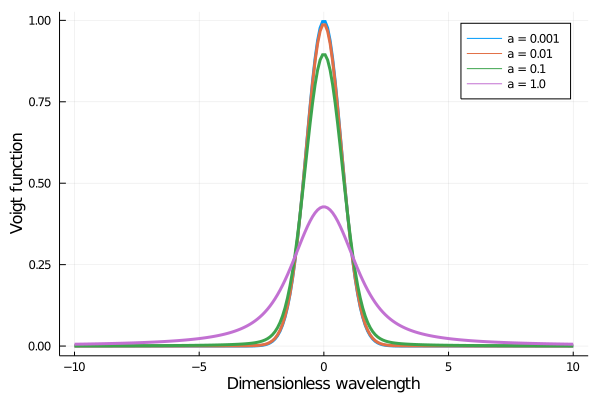

In [3]:
"""
Calculates the Voigt function.
"""
function voigt(γ, x)
    z = (γ .- x * im)
    real(erfcx.(z))
end

u = LinRange(-10, 10, 200)
a = 10 .^ LinRange(-3, 0, 4)

plot(u, voigt(a, u')', xlabel="Dimensionless wavelength", ylabel="Voigt function",
     label=permutedims([string("a = ", γ) for γ in a]), w=3)

The Voigt profile is the final ingredient you need to calculate $\tau_\lambda$ and the spectral line profiles according to equation (7).

### 1.4 The equivalent width of spectral lines

By studying the line profile plots as a function of $\tau(0)$ you can see that the growth of the
absorption feature in the spectrum for increasing $\tau(0)$ 
is faster for small $\tau(0)$ then when it "saturates" for
larger $\tau(0)$.   Minnaert and coworkers introduced the
*equivalent width* $W_\lambda$ as a line-strength
parameter to measure this growth quantitively.
It measures the integrated line depression in the normalized spectrum:

\begin{equation} \tag{13}
   W_\lambda \equiv \int 1 - \frac{I(\lambda)}{I_{\rm cont}}
               {\rm d} \lambda,
\end{equation}

so that its value is the same as the width of a rectangular piece of spectrum that blocks the same amount of spectrum completely (see demonstration figure below).

Here is a visualisation of the area of a line profile and its equivalent width:
<img src="https://tiagopereira.space/ast4310/images/eqw.svg" alt="Radiation through a layer" width="500"/>

To integrate a spectral profile numerically, you can use [NumericalIntegration.jl](https://github.com/dextorious/NumericalIntegration.jl).

### 1.5 The curve of growth

The idea behind the equivalent width was obviously that the amount
of spectral blocking should be a direct measure 
of the number of atoms in the reversing layer.  They should set the opaqueness $\tau(0)$ of the
layer.  The profile plots should illustrate that the profile growth 
is only linear with $\tau(0)$ for $\tau(0) \ll 1$.  The "curve of growth" describes the full dependence: the growth of
the line strength with the line-causing particle density.  Here's an observed example:

<img src="https://tiagopereira.space/ast4310/images/p341.svg" alt="Curve of growth" width="800"/>

*Empirical curve of growth for solar
    Fe I and Ti I lines.
    Taken from [Mihalas (1970)](https://ui.adsabs.harvard.edu/abs/1970stat.book.....M), 
    who took it from [Wright (1948)](https://ui.adsabs.harvard.edu/abs/1948PDAO....8....1W). Wright measured the equivalent widths of 700 lines in the Utrecht  Atlas.
    The quantity $X_f$ along the x axis scales with the product of the
    transition probability and the population density of the lower
    level of each line. The populations were computed from the Saha-Boltzmann laws as in
    Exercise 1. The transition probabilities were measured in the laboratory.
    The normalization of $W$ by $\lambda$ removes the $\lambda$-dependence of the Doppler width.*

---

### Exercise 1: The Planck Law and radiation through an isothermal layer


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Plot the Planck function $B_\lambda$ for 100 $< \lambda <$ 2000 nm for a range of temperatures (5000 to 8000 K). Use a log scale for both the x and y axes. Explain the slopes of the righthand part.

* Use equation (5) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:


``` julia
b_lambda = 2
τ = 10 .^ LinRange(-2, 1, 100)
i0 = collect(0:4)'
```

* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$? (Hint: use a log scale in the x and y axes to study the behavior at small $\tau$.)  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
 
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?
    

</div>


### Exercise 2: Spectral lines from a solar reversing layer

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model for a reference wavelength of 500 nm, writing code for this purpose. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

* Study line profiles with different $\tau_0$, using `tau0 = 10 ** numpy.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin and optically thick, at line center? And at $u=5$?

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center, $I_{u=0}$? Check these values by computing them directly. What happens to these values at other wavelengths?  

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

</div>


### Exercise 3: The curve of growth

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Using the code from Exercise 2, compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.  

* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)
    
</div>